# Jonathan Surya Sanjaya - 2602070351

# Libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [4]:
url = 'https://drive.google.com/uc?export=download&id=1q50nYBbOV7_UFq0tSTFtulNFKjt9Naxx'
data = pd.read_csv(url)
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Statistical Summary

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
UnifSize,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
UnifShape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
MargAdh,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
SingEpiSize,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
BlandChrom,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
NormNucl,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mit,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


### Data Entrys

In [14]:
missing_values = data.isnull().sum()
missing_values_table = pd.DataFrame(missing_values, columns=['Missing Values'])
missing_values_table

,Missing Values
ID,0
Clump,0
UnifSize,0
UnifShape,0
MargAdh,0
SingEpiSize,0
BareNuc,0
BlandChrom,0
NormNucl,0
Mit,0


# Exploratory Data Analysis

## Relationship between variables

### Class -> Target distribution

C:\Users\user\AppData\Local\Temp\ipykernel_17684\2645786262.py:13: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=data, x='Class', hue='Class', palette=palette, ax=ax[1])


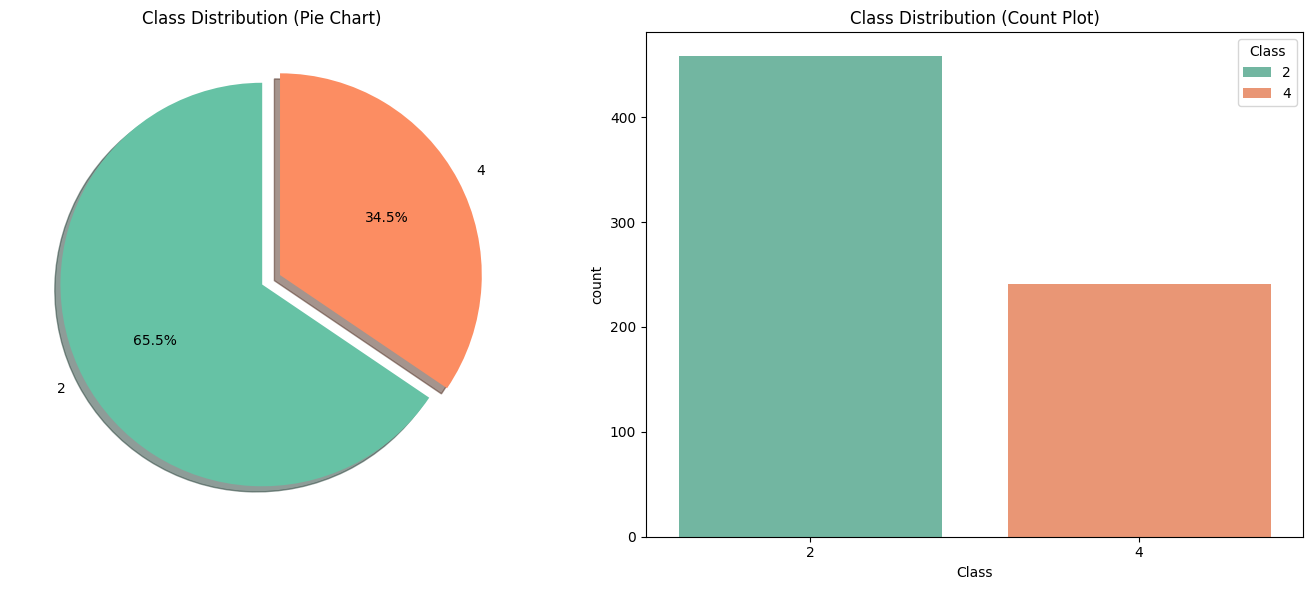

In [121]:
palette = sns.color_palette("Set2")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
class_counts = data['Class'].value_counts()
ax[0].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90,
          colors=palette, explode=[0, 0.1], shadow=True)
ax[0].set_title('Class Distribution (Pie Chart)')

# Count plot
sns.countplot(data=data, x='Class', hue='Class', palette=palette, ax=ax[1])
ax[1].set_title('Class Distribution (Count Plot)')
plt.tight_layout()
plt.show()

### ID

In [122]:
data['ID'].value_counts()

ID
1182404    6
1276091    5
1198641    3
897471     2
1116192    2
          ..
1232225    1
1236043    1
1241232    1
1241559    1
814265     1
Name: count, Length: 645, dtype: int64

Karena ID tidak memiliki feature apapun (hanya membedakan satu row dengan row lainnya), maka fitur ini tidak ada hubungannya dengan model kita dan perlu dihapus.

### Clump thickness

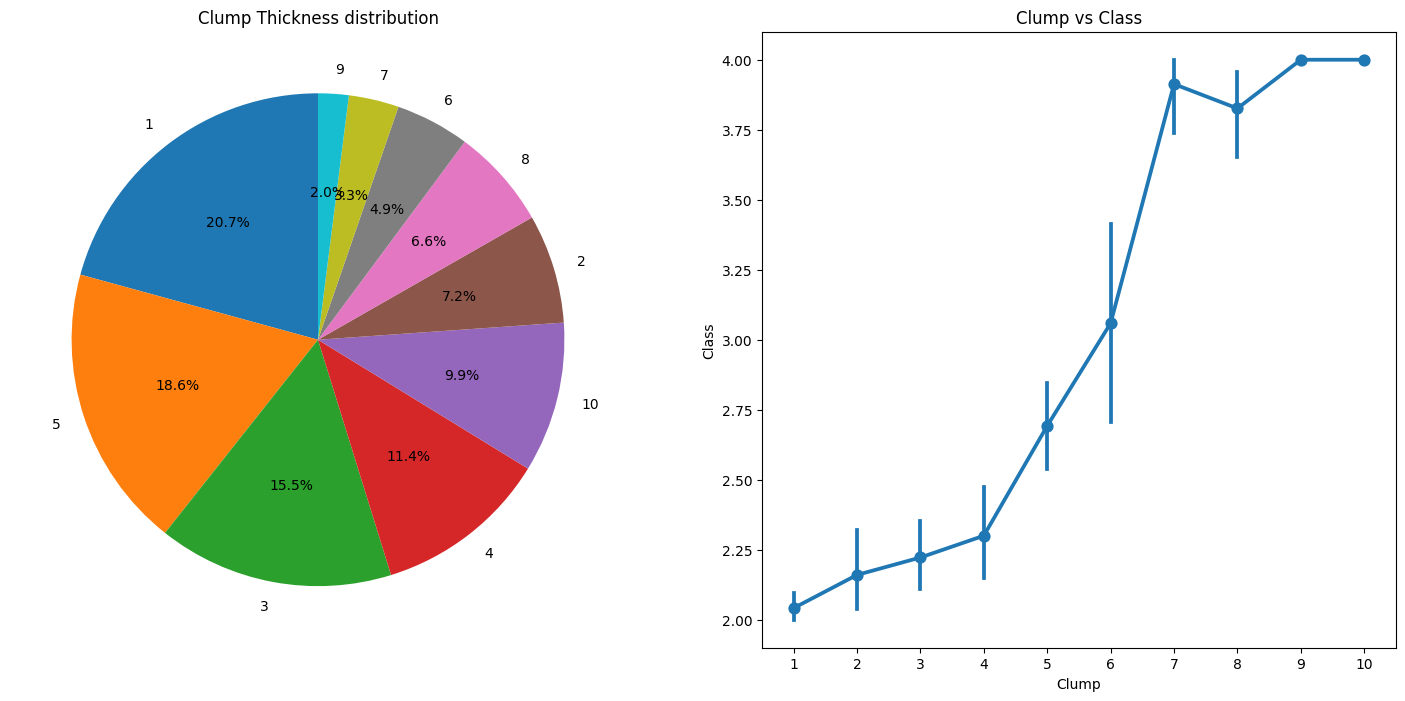

In [62]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))

data['Clump'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', startangle = 90)
ax[0].set_ylabel('')
ax[0].set_title('Clump Thickness distribution')

sns.pointplot(data = data, x = 'Clump', y = 'Class')
ax[1].set_title('Clump vs Class')

plt.show()

Dari graph diatas, kita bisa melihat bahwa Clump memiliki pengaruh dalam menentukan Class, dimana Class 4 (Malignant) memiliki Clump Thickness yang condong dalam kategori yang lebih besar.

### UnifSize	UnifShape

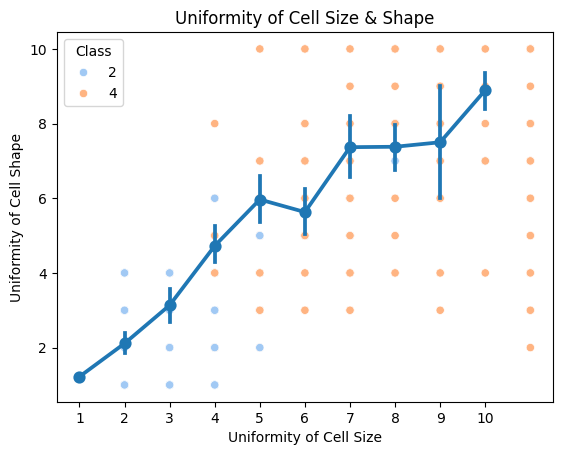

In [109]:
sns.pointplot(data = data, x = 'UnifSize', y = 'UnifShape')
sns.scatterplot(data = data, x = 'UnifSize', y = 'UnifShape', hue = 'Class', palette='pastel')
plt.title('Uniformity of Cell Size & Shape')
plt.xlabel('Uniformity of Cell Size')
plt.ylabel('Uniformity of Cell Shape')
plt.show()

Graph di atas menunjukkan, bahwa Uniformity of Cell Size & Cell Shape memiliki sedikit hubungan linear, dimana semakin besar kategori Uniformity of Cell Size, maka semakin besar juga Uniformity of Cell Shape. dan semakin tinggi, maka kategori Class akan lebih condong ke kategori 4, Malignant.

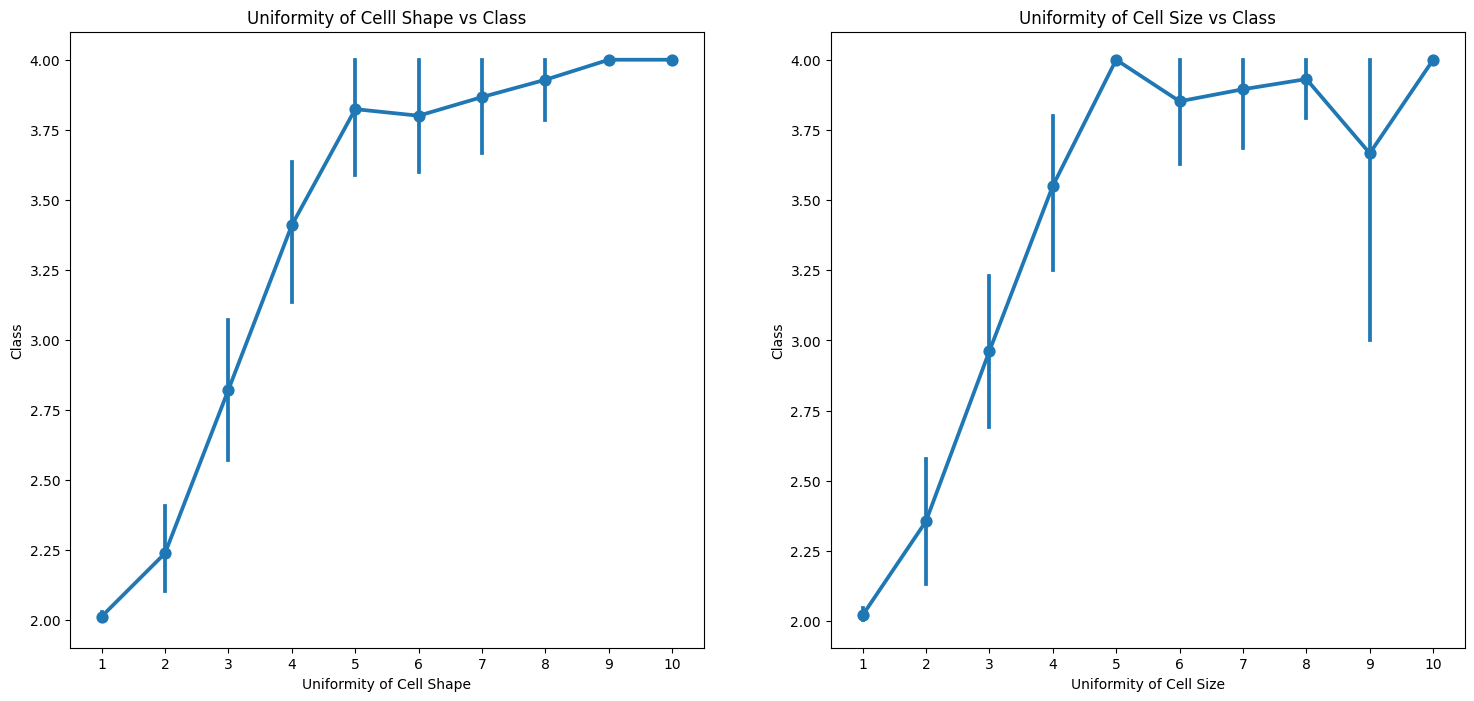

In [85]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.pointplot(data = data, x = 'UnifShape', y = 'Class', ax = ax[0])
sns.pointplot(data = data, x = 'UnifSize', y = 'Class', ax = ax[1])
ax[1].set_xlabel('Uniformity of Cell Size')
ax[0].set_xlabel('Uniformity of Cell Shape')
ax[0].set_title('Uniformity of Celll Shape vs Class')
ax[1].set_title('Uniformity of Cell Size vs Class')
plt.show()

Uniformity of Cell Shape & Size menunjukkan prilaku yang sama, dimana semakin besar categori mereka, maka Class akan lebih condong kepada kategori 4, Malignant.

### MargAdh	

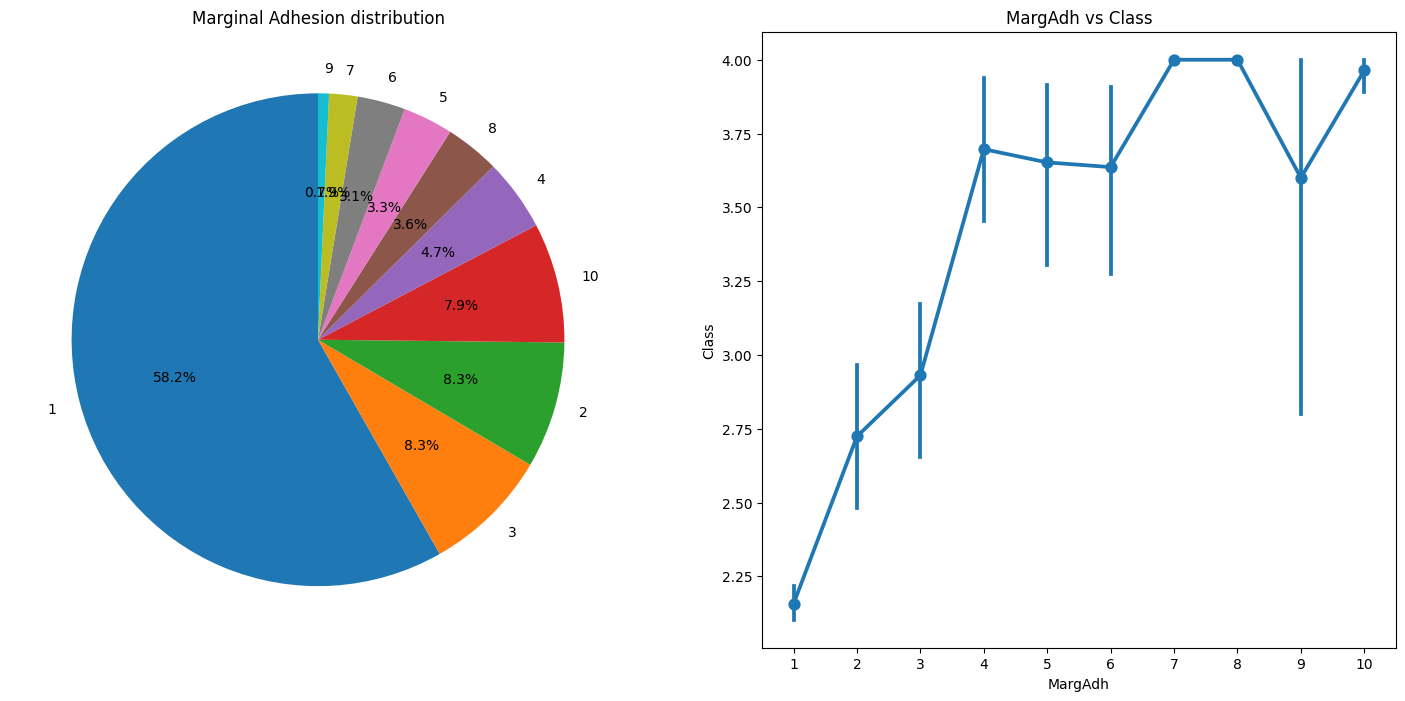

In [91]:
fig, ax = pfig, ax = plt.subplots(1, 2, figsize = (18, 8))

data['MargAdh'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', startangle = 90)
ax[0].set_ylabel('')
ax[0].set_title('Marginal Adhesion distribution')

sns.pointplot(data = data, x = 'MargAdh', y = 'Class')
ax[1].set_title('MargAdh vs Class')

plt.show()

MargAdh juga menunjukkan prilaku yang sama, walau terkadang graph memiliki penurunan yang tidak drastis, tetapi semakin besar categori MargAdh, maka Class akan lebih condong kepada kategori 4, Malignant.

### SingEpiSize

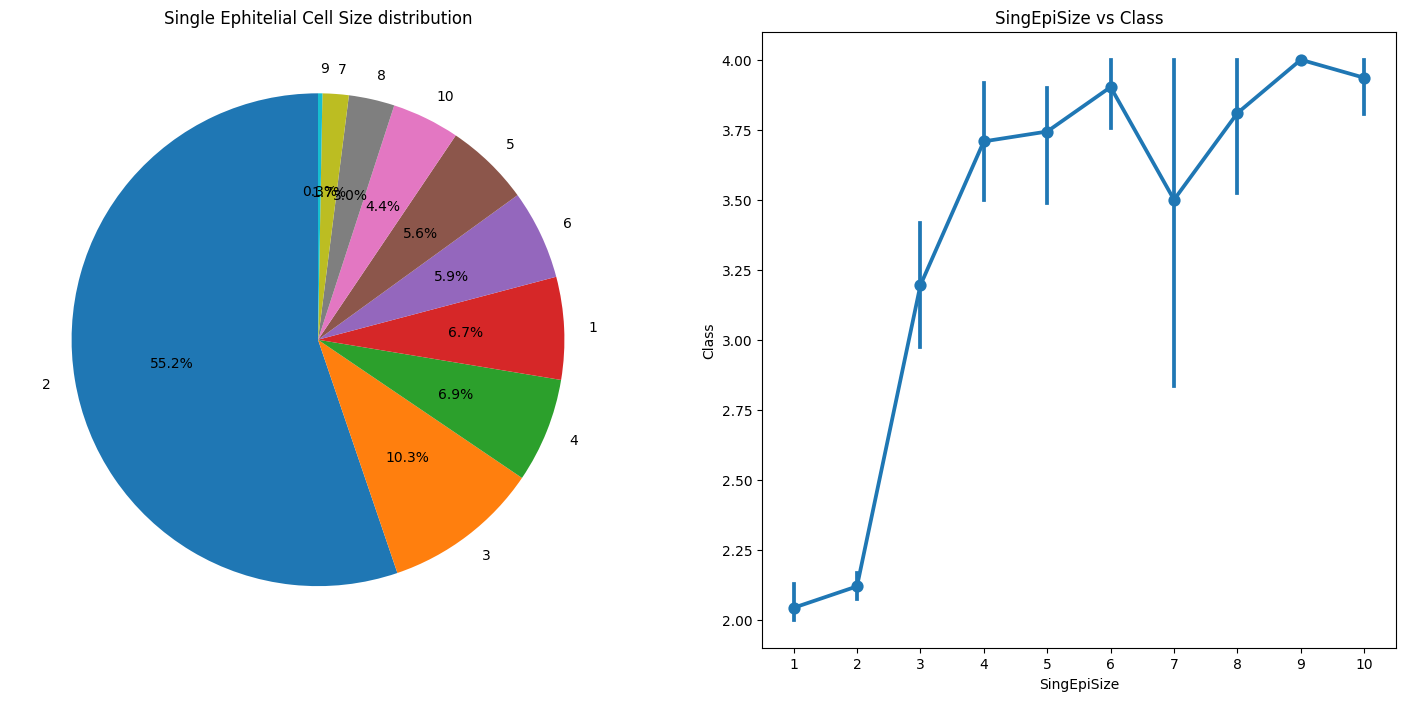

In [93]:
fig, ax = pfig, ax = plt.subplots(1, 2, figsize = (18, 8))

data['SingEpiSize'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', startangle = 90)
ax[0].set_ylabel('')
ax[0].set_title('Single Ephitelial Cell Size distribution')

sns.pointplot(data = data, x = 'SingEpiSize', y = 'Class')
ax[1].set_title('SingEpiSize vs Class')

plt.show()

SingEpiSize juga menunjukkan prilaku yang sama dengan MargAdh, dimana walau mengalami penurunan yang tidak signifikan, semakin tinggi categori akan semakin condong pada kategori 4, Malignant.

### BareNuc

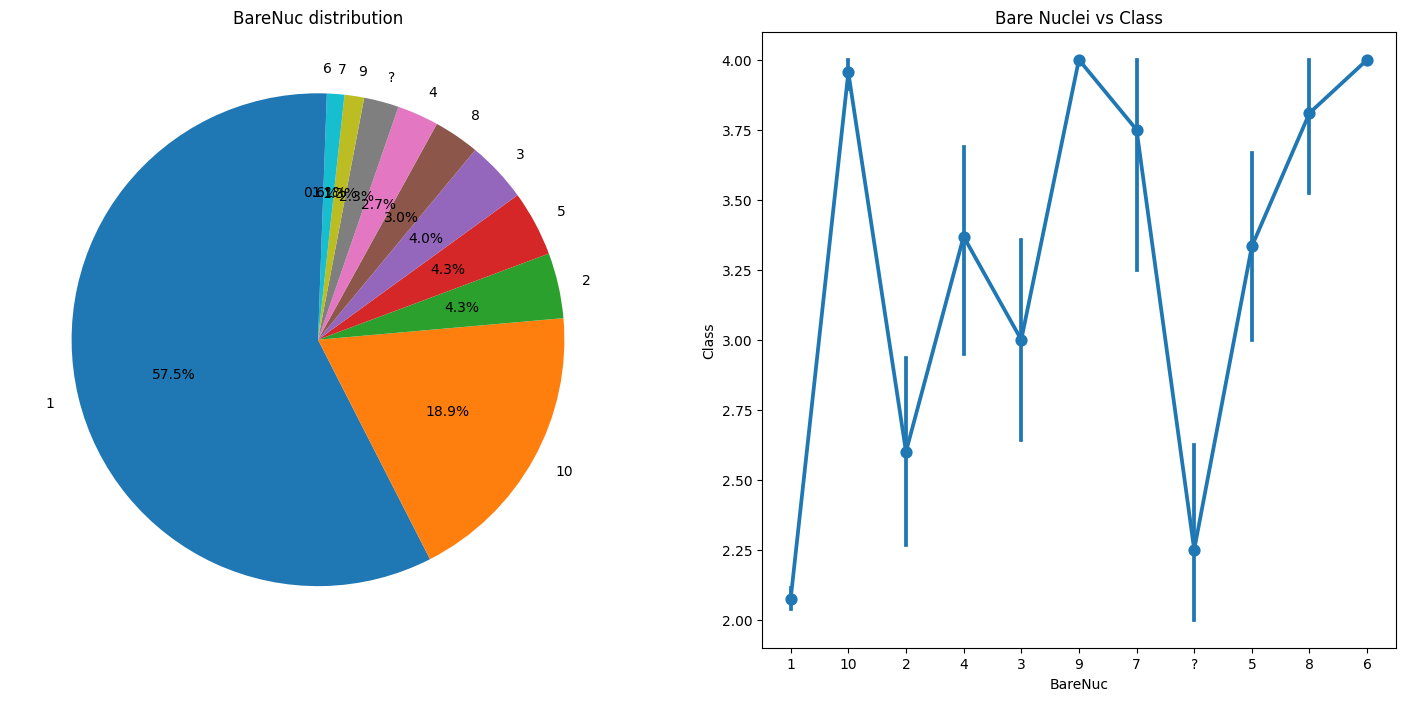

In [97]:
fig, ax = pfig, ax = plt.subplots(1, 2, figsize = (18, 8))

data['BareNuc'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', startangle = 90)
ax[0].set_ylabel('')
ax[0].set_title('BareNuc distribution')

sns.pointplot(data = data, x = 'BareNuc', y = 'Class')
ax[1].set_title('Bare Nuclei vs Class')

plt.show()

Barenuc tidak menunjukkan relasi seperti variable lainnya, dimana tidak ada pattern yang bisa diambil dari feature ini. Sebagaimana relasi dengan Class mengalami peningkatan dan penurunan yang signifikan.

### BlandChrom

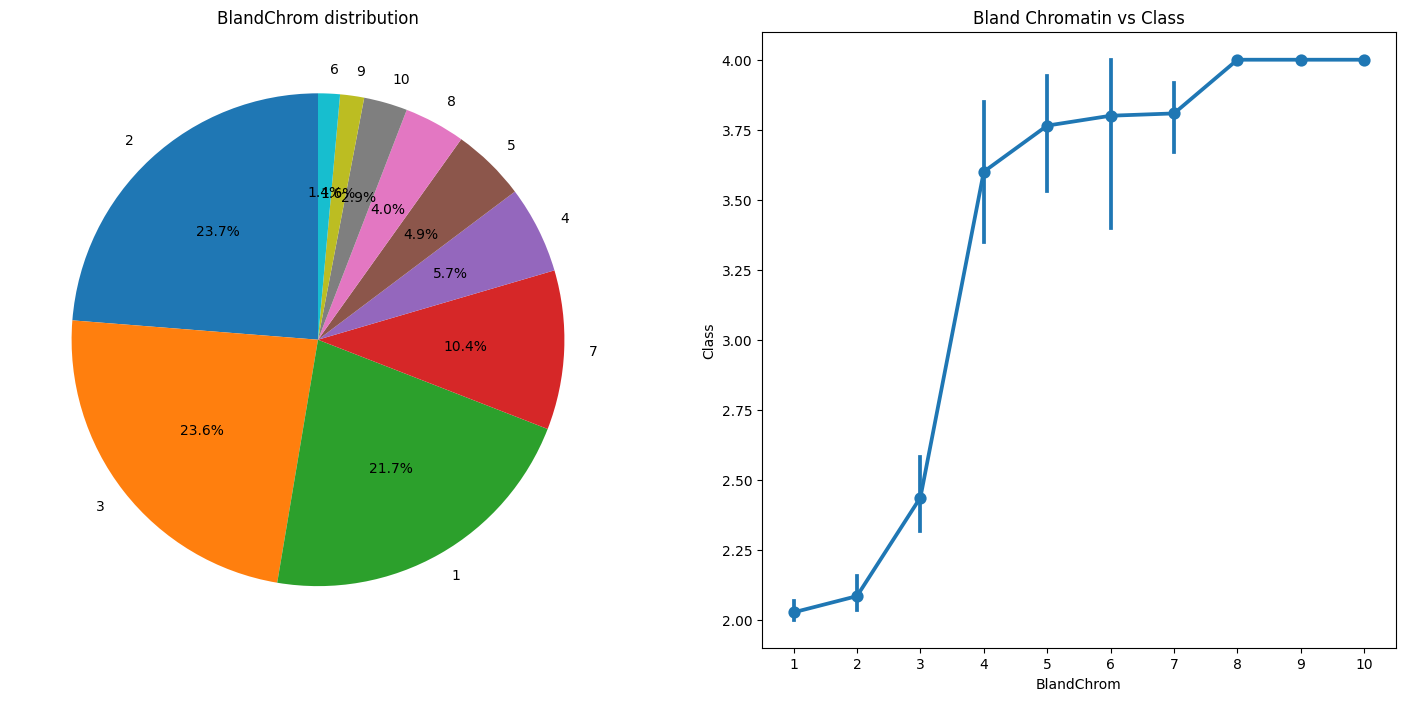

In [96]:
fig, ax = pfig, ax = plt.subplots(1, 2, figsize = (18, 8))

data['BlandChrom'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', startangle = 90)
ax[0].set_ylabel('')
ax[0].set_title('BlandChrom distribution')

sns.pointplot(data = data, x = 'BlandChrom', y = 'Class')
ax[1].set_title('Bland Chromatin vs Class')

plt.show()

Untuk Blandchrom, seperti kebanyakan variable pada umumnya, dimana semakin tinggi categorinya, maka akan semakin condong kepada kategori 4, Malignant.

### NormNucl

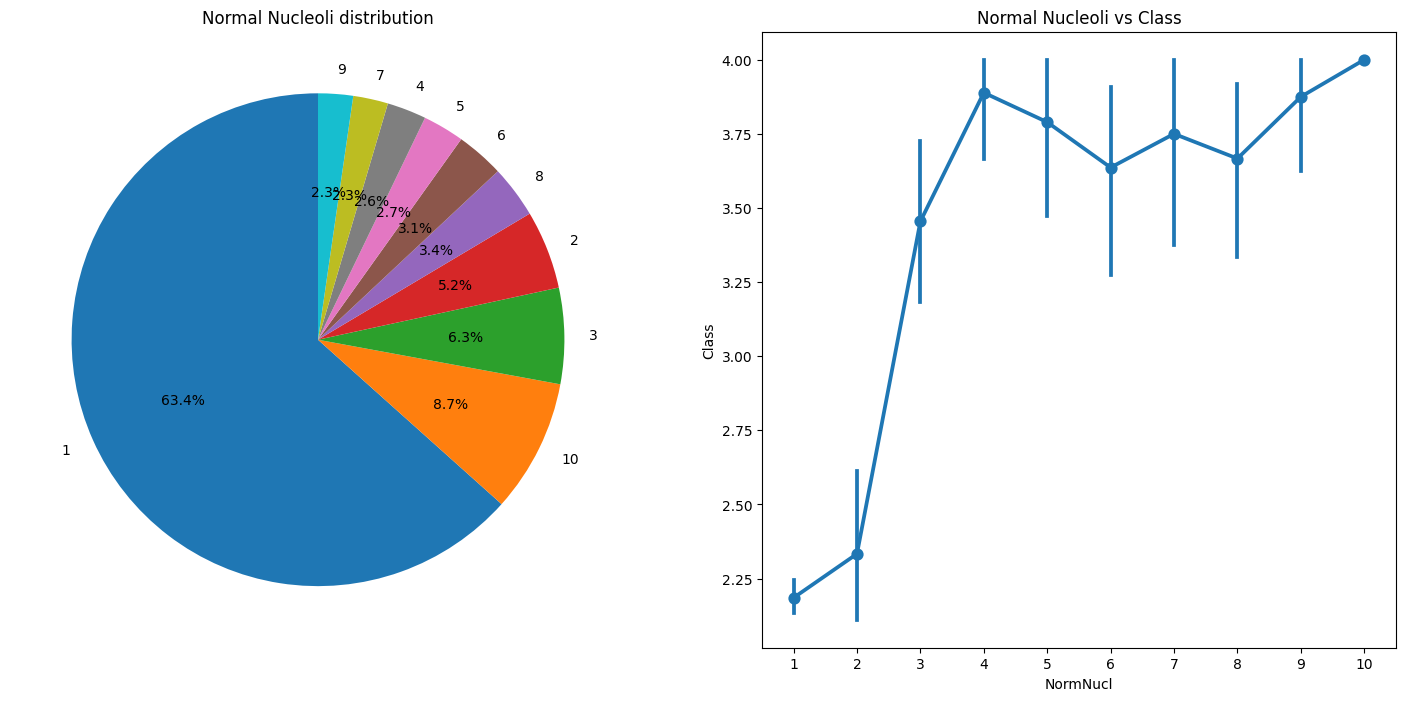

In [99]:
fig, ax = pfig, ax = plt.subplots(1, 2, figsize = (18, 8))

data['NormNucl'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', startangle = 90)
ax[0].set_ylabel('')
ax[0].set_title('Normal Nucleoli distribution')

sns.pointplot(data = data, x = 'NormNucl', y = 'Class')
ax[1].set_title('Normal Nucleoli vs Class')

plt.show()

Normal Nucleoli juga menunjukkan prilaku yang sama pada sebagian besar fitur, walau menagalmi penurunan yang tidak terlalu signifikan, semakin besar categorinya, maka akan condong kepada kategori 4, Malignant. Normal Nuclei sendiri didominasi oleh categori 1 yang menunjuk kategori Beningn.

### Mitose

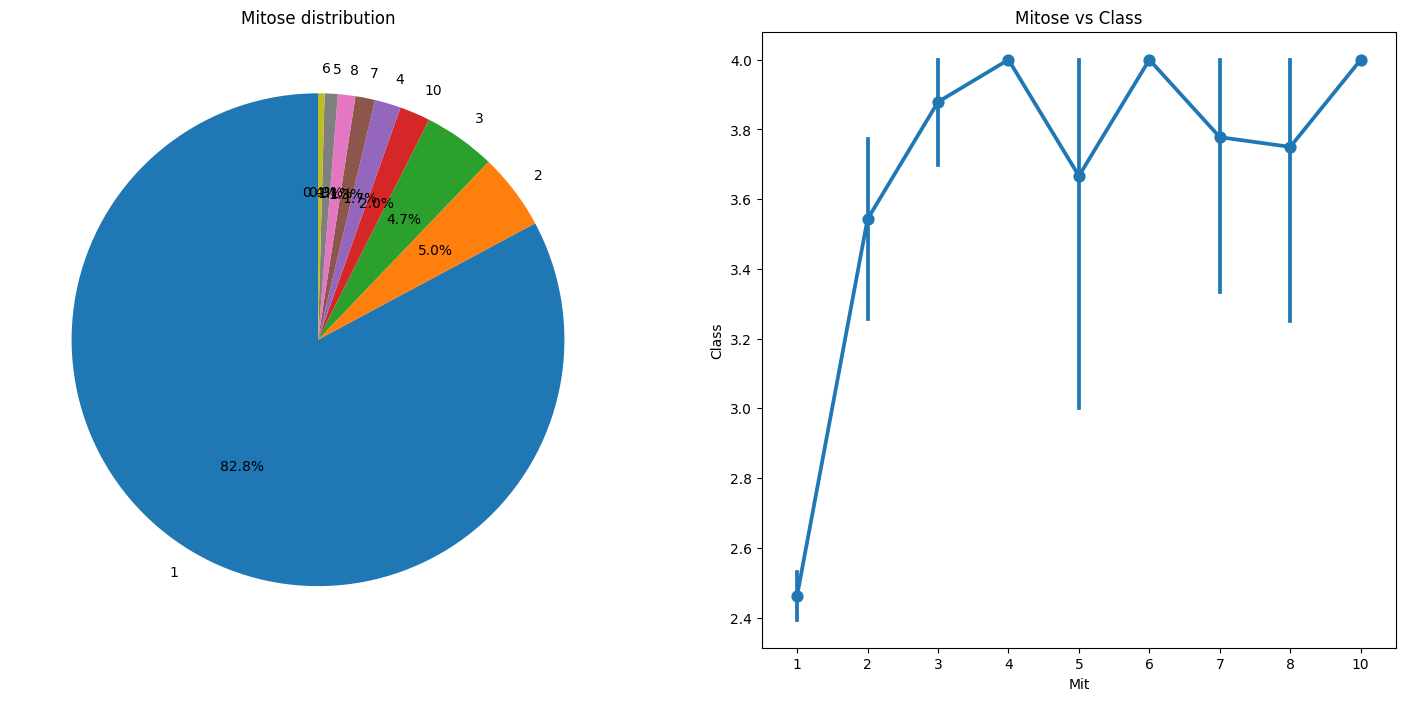

In [100]:
fig, ax = pfig, ax = plt.subplots(1, 2, figsize = (18, 8))

data['Mit'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', startangle = 90)
ax[0].set_ylabel('')
ax[0].set_title('Mitose distribution')

sns.pointplot(data = data, x = 'Mit', y = 'Class')
ax[1].set_title('Mitose vs Class')

plt.show()

Sama seperti Normal Nucleoli yang didominasi oleh kategori 1 yang menunjukkan kategori Beningn, Mitosis juga demikian, dimana sisanya menunjuk pada kategori 4, Malignent.

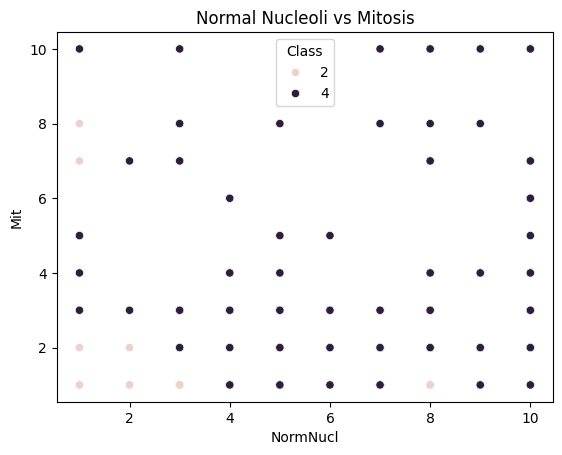

In [107]:
sns.scatterplot(data = data, x = 'NormNucl', y = 'Mit', hue = 'Class')
plt.title('Normal Nucleoli vs Mitosis')
plt.show()

Namun dari sini kita bisa memlihat, bahwa keduanya tidak memiliki relasi apapun

## Correlation Between Features

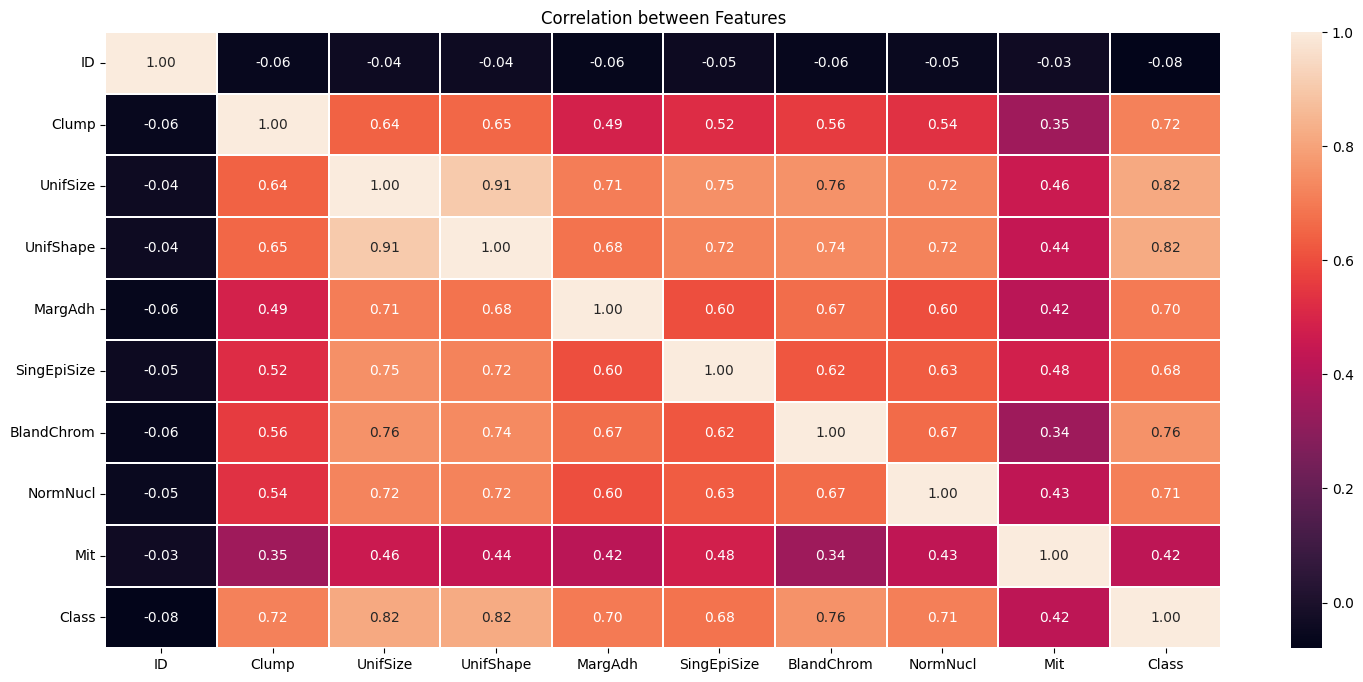

In [114]:
numerical = data.select_dtypes(include='number')
plt.figure(figsize=(18, 8))
sns.heatmap(data = numerical.corr(), annot = True, fmt = '.2f', linewidths=0.2)
plt.title('Correlation between Features')
plt.show()

Karena beberapa feature memiliki korelasi yang tinggi antar sesama fitur, maka fitur tersebut harus didrop.

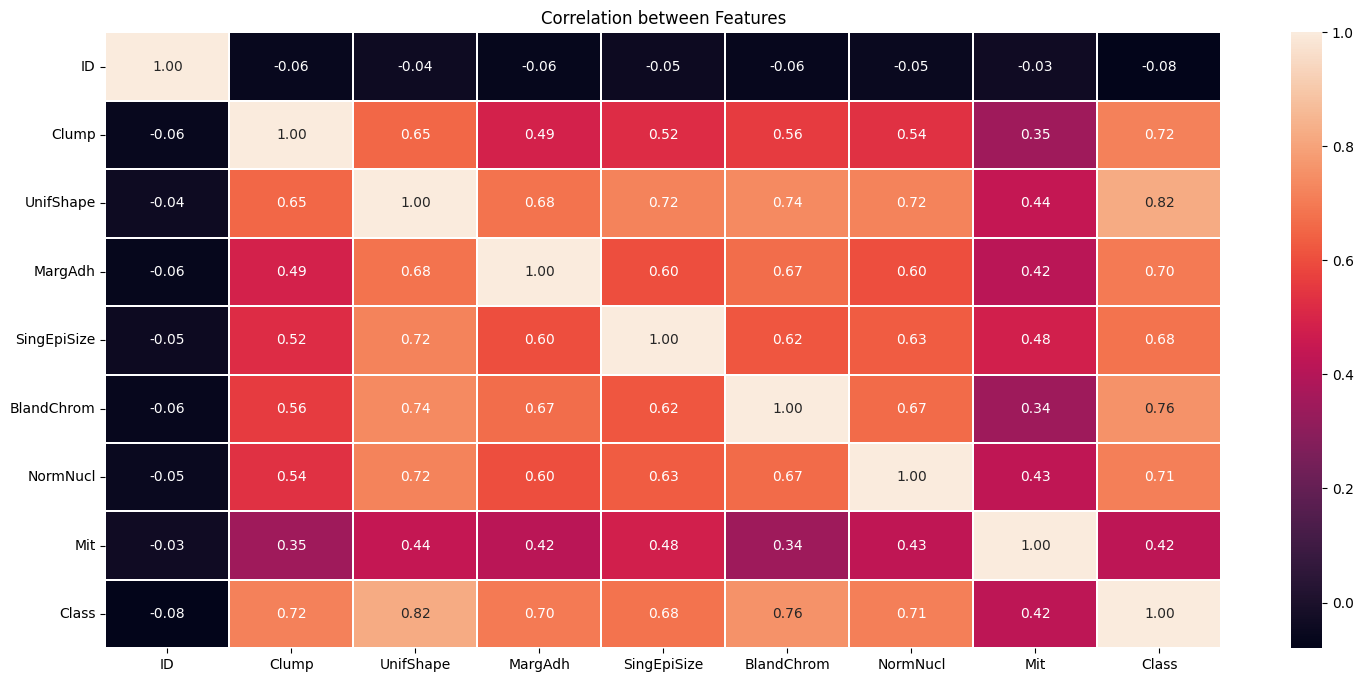

In [115]:
new_data = data.drop(columns=['UnifSize'])
numerical = new_data.select_dtypes(include='number')
plt.figure(figsize=(18, 8))
sns.heatmap(data = numerical.corr(), annot = True, fmt = '.2f', linewidths=0.2)
plt.title('Correlation between Features')
plt.show()

Karena sesama fitur sudah tidak ada yang memiliki korelasi diatas 0.8, maka data sudah bisa digunakan untuk melakukan prediksi. Beberapa mungkin terdapat 0.8, tetapi berhubungan dengan Class (Target) sehingga bisa diabaikan.

# Data Processing

## Handling missing data

In [133]:
data['BareNuc'].value_counts()

BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

Karena Barenuc memiliki 16 '?' value, yang dimana entry ini lebih sedikit dari 10% data yang ada, maka kita bisa mendrop value ini ketimbang dengan mengisi dengan modus / mean agar tidak merusakk data yang ada.

In [136]:
data = data[data['BareNuc'] != '?']
data['BareNuc'].value_counts()

BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64

## Splitting Feature & Target

In [137]:
X = data.drop(columns=['Class', 'UnifSize', 'ID'])
y = data['Class']

## Splitting Training and Test Data

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Modeling

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        87
           4       0.92      0.98      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137



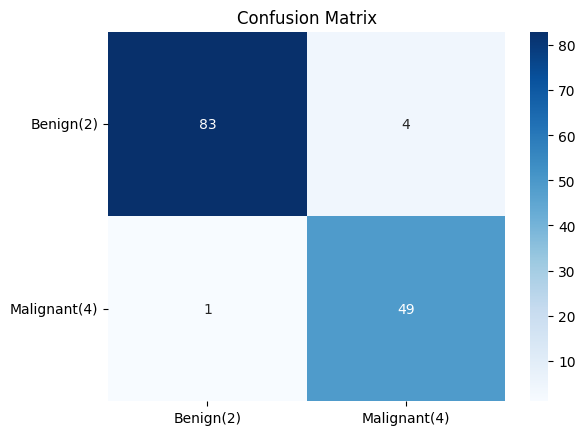

In [173]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
prediction = svm.predict(X_test)
print(classification_report(y_test,prediction))

cm = confusion_matrix(y_test, prediction)
labels = ['Benign(2)', 'Malignant(4)']
sns.heatmap(data = cm, annot= True, fmt = '.0f', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.yticks(rotation=0)
plt.show()